In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/llnl

/content/drive/MyDrive/llnl


In [ ]:
%cd yolov5

/content/drive/MyDrive/llnl/yolov5


In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt  

import torch
from IPython.display import Image, clear_output  

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.9.0+cu102 (Tesla P100-PCIE-16GB)


In [ ]:
!unzip -q ../train.zip -d ../  #unzip train val images

In [ ]:
!python train.py --img 230 --batch 512 --epochs 1000 --data streak.yaml --weights yolov5s.pt --cache

Streaming output truncated to the last 5000 lines.
                 all          3          3     0.0026      0.667     0.0018   0.000264

     Epoch   gpu_mem       box       obj       cls    labels  img_size
     1/999     15.1G    0.1231   0.01055         0       648       256: 100% 2/2 [00:02<00:00,  1.01s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 1/1 [00:00<00:00, 12.56it/s]
                 all          3          3    0.00253      0.667     0.0019   0.000273

     Epoch   gpu_mem       box       obj       cls    labels  img_size
     2/999     15.1G    0.1236   0.01053         0       698       256: 100% 2/2 [00:01<00:00,  1.03it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 1/1 [00:00<00:00, 21.22it/s]
                 all          3          3     0.0025      0.667    0.00184   0.000369

     Epoch   gpu_mem       box       obj       cls    labels  img_size
     3/999     1

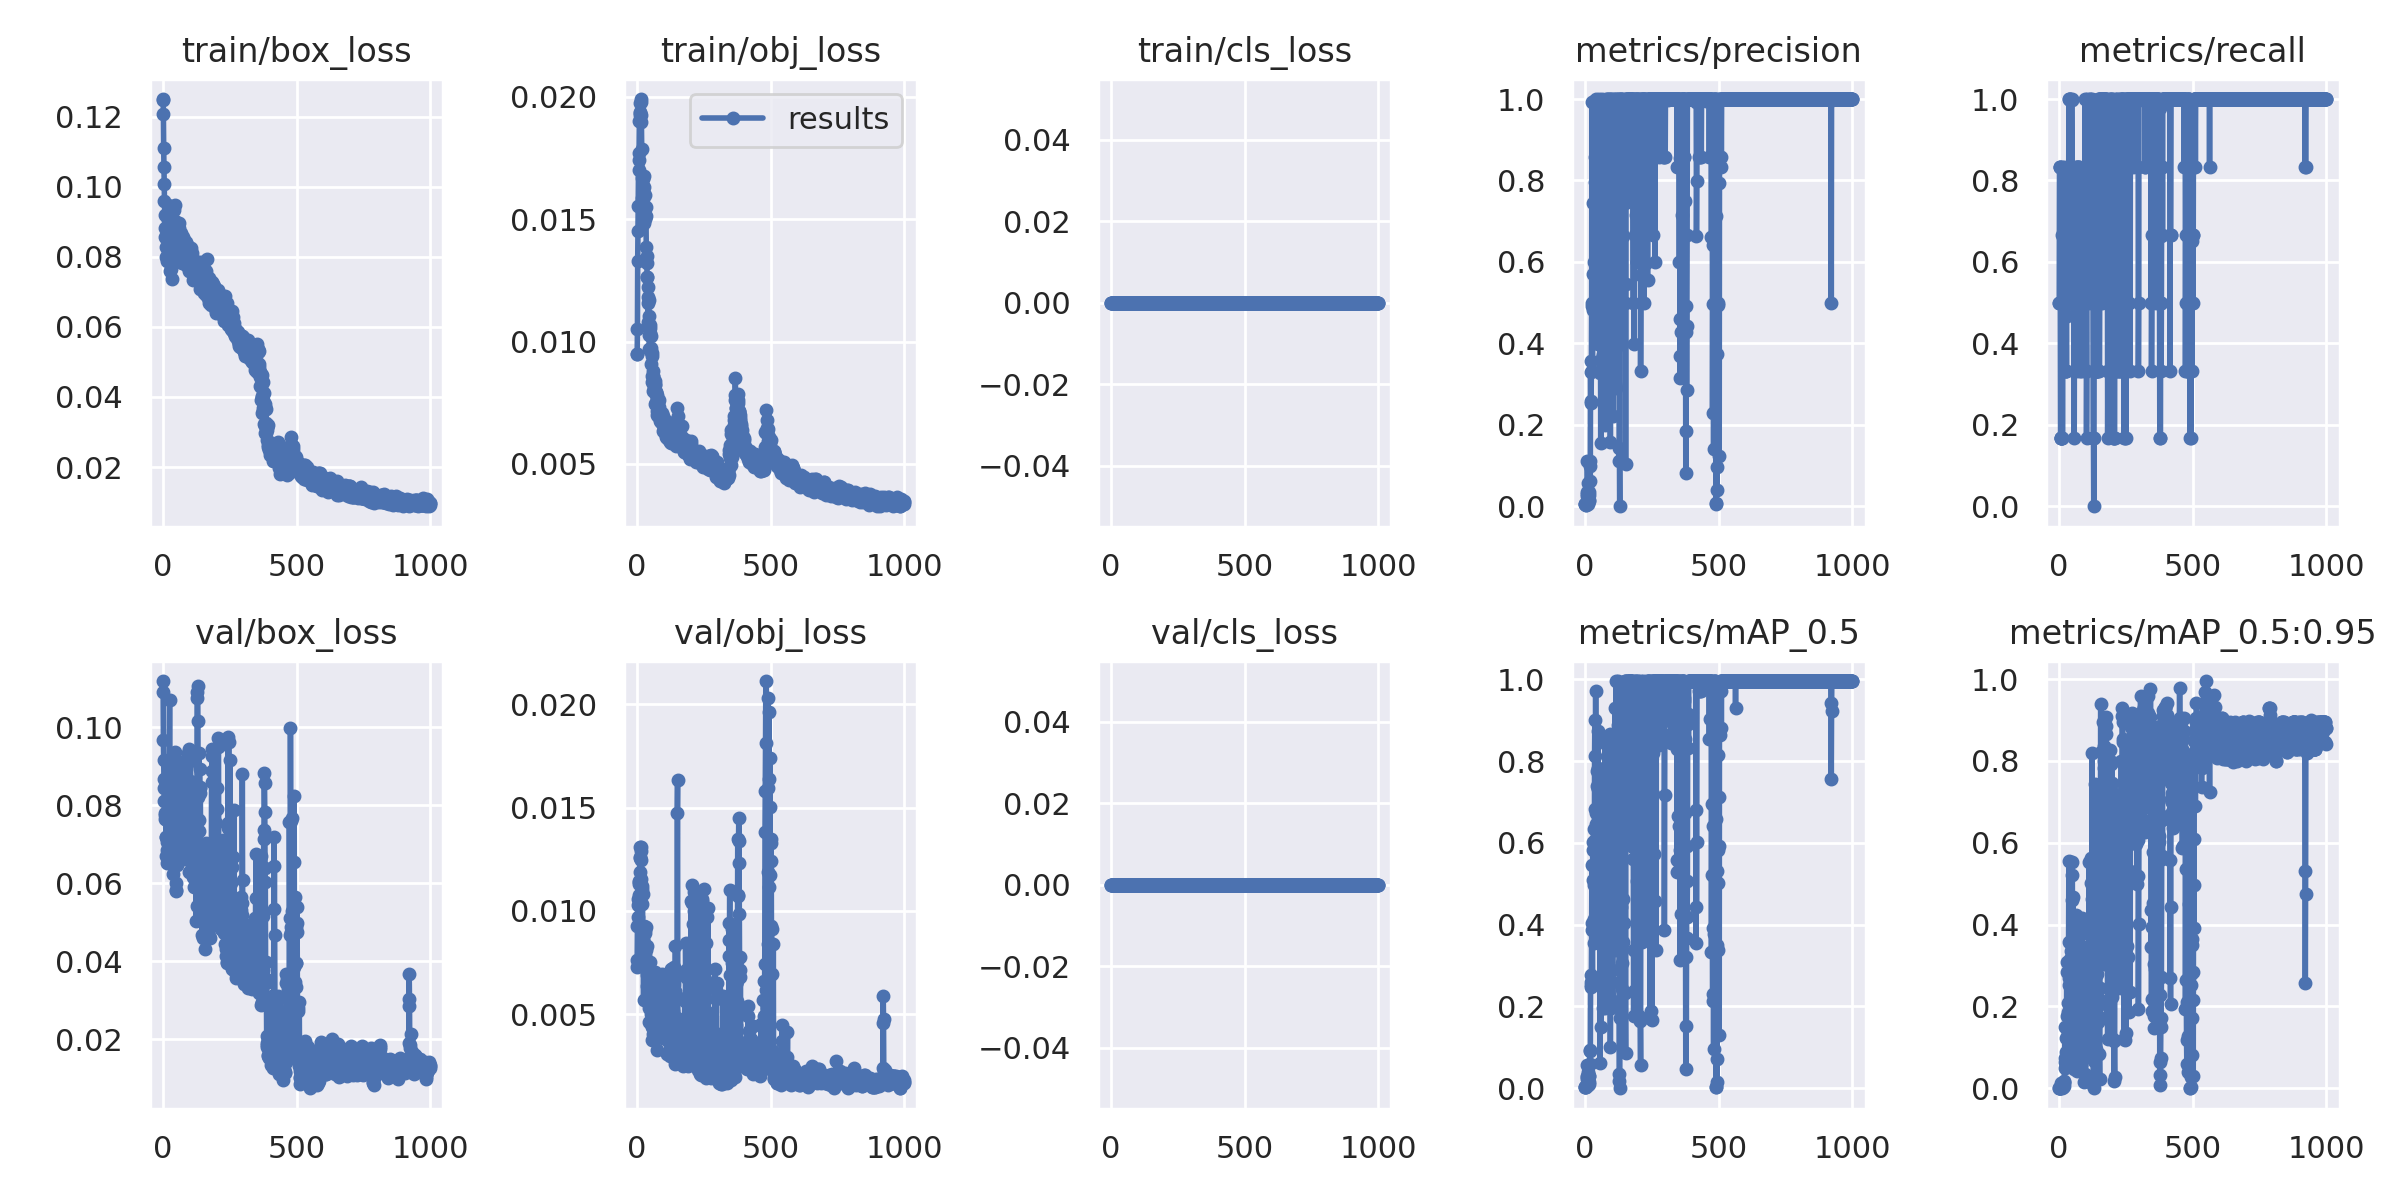

In [ ]:
from utils.plots import plot_results 
#plot_results(save_dir='runs/train/exp')  # plot all results*.txt files in 'runs/train/exp'
Image(filename='runs/train/exp/results.png', width=800)

In [ ]:
%cd yolov5

/content/drive/My Drive/llnl/yolov5/yolov5


In [ ]:
!python detect.py --weights ../streak_lask.pt --img 3104 --conf-thres 0.5 --source ../streak_jpeg/
#Image(filename='runs/detect/exp/zidane.jpg', width=600)

detect: weights=['../streak_lask.pt'], source=../streak_jpeg/, imgsz=3104, conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
YOLOv5 🚀 2021-7-18 torch 1.9.0+cu102 CUDA:0 (Tesla P100-PCIE-16GB, 16280.875MB)

Fusing layers... 
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Model Summary: 224 layers, 7053910 parameters, 0 gradients, 16.3 GFLOPs
image 1/30 /content/dri